<a href="https://colab.research.google.com/github/benecaio/analiseSinaisPhyton/blob/main/6_Convolucao_SinalDiscreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sumário

1. [Convolução](#1.-Convolução)
2. [Sinal Discreto](#2.-Sinal_Discreto)

## 1. Convolução


A convolução é uma operação matemática entre dois sinais $x(t)$ e $y(t)$ que resulta em um terceiro sinal, $h(t)$. Sua notação é dada por:

<p style="text-align:center">$ h(t) = x(t) * y(t) $ </p>

Pordemos compreender a convolução como a interação entre dois sinais. Um exemplo clássico da aplicação da convolução na geofísica é o sismograma, uma vez que corresponde à convolução entre a resposta impulsiva da Terra e uma onda sísmica. 

Vamos definir $x(t)$ como a resposta impulsiva da Terra e $y(t)$ como a onda sísmica característica de uma fonte (como um explosivo).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Vamos criar um código com um array que represente a resposta impulsiva:

In [2]:
t = np.linspace(0,0.02,351) 

ta = 0.004 
tb = 0.006
tc = 0.008
td = 0.012
te = 0.016
tf = 0.018

sismoA = np.zeros(len(t))

sismoA[t==ta]=1
sismoA[t==tb]=0.7
sismoA[t==td]=-0.7
sismoA[t==te]=-0.4
sismoA[t==tf]=-0.6

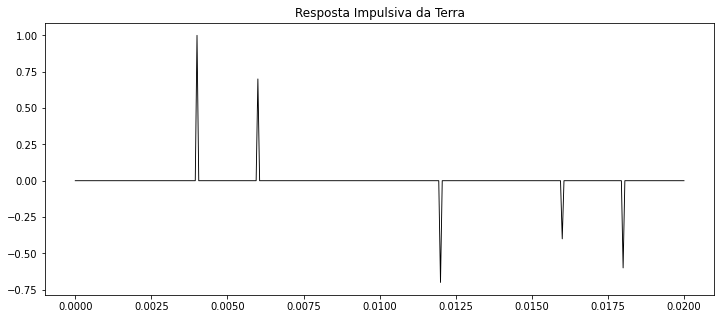

In [3]:
fig=plt.figure(figsize=(12,5))

plt.plot(t, sismoA, "k", linewidth=.9)
plt.title("Resposta Impulsiva da Terra")
plt.show()

Vamos supor que a onda sísmica da nossa fonte corresponda à forma de onda Ricker. Sua equação é:


<p style="text-align:center">$ r(t) = (1 - 2\pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}  $ </p>

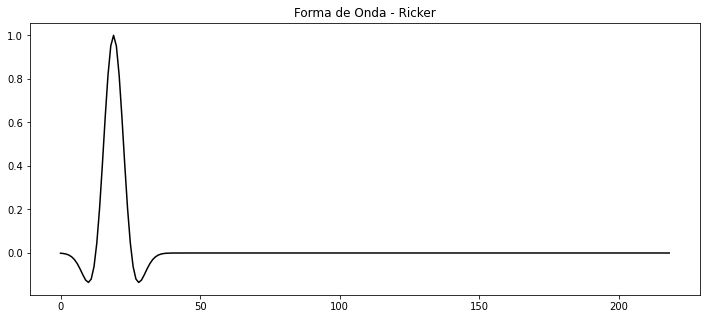

In [5]:
import scipy.signal as signal

dt = 0.0001

def ricker(nps, fr, dt):
    npt = nps*dt
    t = np.arange(-npt/2, npt/2, dt)
    rick1=(1-t * t * fr**2 * np.pi**2) * np.exp(-t**2 * np.pi**2 * fr**2)
    rick=rick1[int(np.round(nps/2)) - (int(np.round(1/fr/dt)))+1:nps]
    return rick
    
rick = ricker(400,500,dt)

fig=plt.figure(figsize=(12,5))
plt.plot(rick, "k")
plt.title("Forma de Onda - Ricker")
plt.show()

Vamos criar o sismograma a partir da convolução entre nossos sinais:

In [6]:
conv = signal.fftconvolve(sismoA, rick, "full")

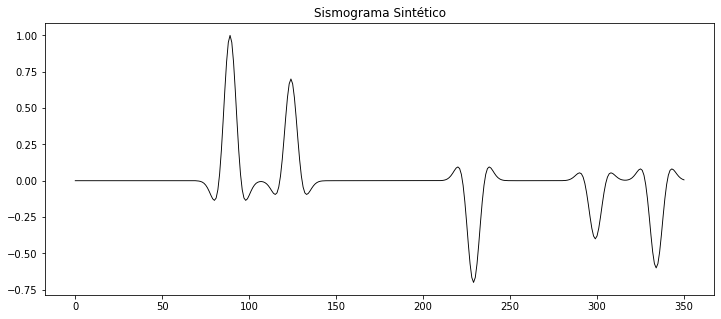

In [7]:
fig=plt.figure(figsize=(12,5))

plt.plot(conv[:(len(sismoA))], "k", linewidth=.9)
plt.title("Sismograma Sintético")
plt.show()

Vamos imaginar que refizemos a aquisição com outra fonte e outro sistema de aquisição. Neste novo exemplo, a forma de onda característica da fonte é uma sinc. Vamos plotar o novo sismograma:

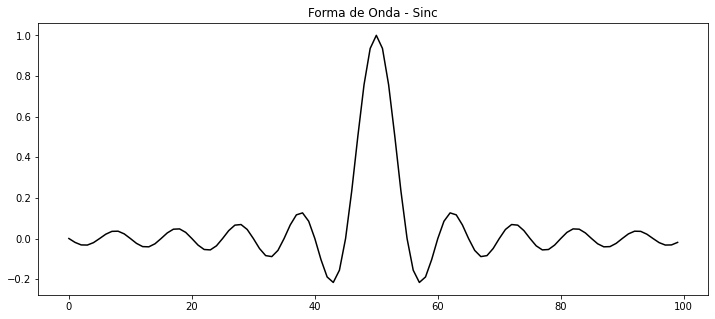

In [9]:
def sincr(nps, fr, dt):
    npt = nps*dt
    t = np.arange(-npt/2, npt/2, dt)
    sincr=np.sinc(2*t)
    return sincr

sinc = sincr(100,2,0.1)

fig=plt.figure(figsize=(12,5))

plt.plot(sinc, "k")
plt.title("Forma de Onda - Sinc")
plt.show()

In [10]:
conv2 = signal.fftconvolve(sismoA, sinc, "same")

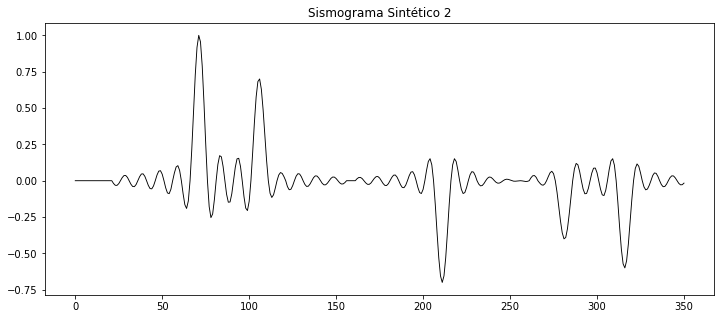

In [11]:
fig=plt.figure(figsize=(12,5))

ax1=plt.subplot(111)
ax1.plot(conv2, "k", linewidth=.9)
plt.title("Sismograma Sintético 2")
plt.show()

## 2. Sinal Discreto

Até agora, imaginamos todas nossas funções como contínuas. No entanto, ao tratar de sensores e dados geofísicos, precisamos compreender que os sinais passam por uma discretização. Ou seja, a aquisição de um sinal é feita por meio de medidas finitas espaçadas por um determinado intervalo de tempo $dt$. 

Vamos imaginar que fizemos a amostragem de um sinal com um instrumento com $dt=0.2$ segundos.

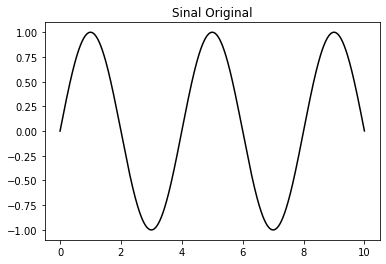

In [12]:
dt = 0.001 #criamos um dt bem pequeno para fingir que esse sinal original é contínuo
t = np.arange(0,10,dt)

fr_1 = 0.25
sinal = np.sin(2*np.pi*fr_1*t)

plt.plot(t,sinal,"k")
plt.title("Sinal Original")
plt.show()

Na verdade, o que o computador recebe e compreende do nosso sinal é o seguinte:

<ipython-input-13-6bd8673e3408>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t_2,sinal_2)


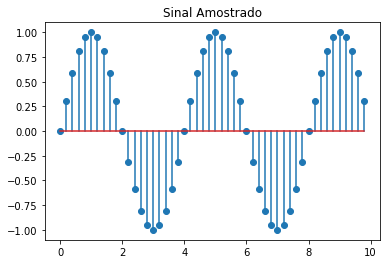

In [13]:
dt = 0.2
t_2 = np.arange(0,10,dt)

fr_1 = 0.25
sinal_2 = np.sin(2*np.pi*fr_1*t_2)

plt.stem(t_2,sinal_2)
plt.title("Sinal Amostrado")
plt.show()

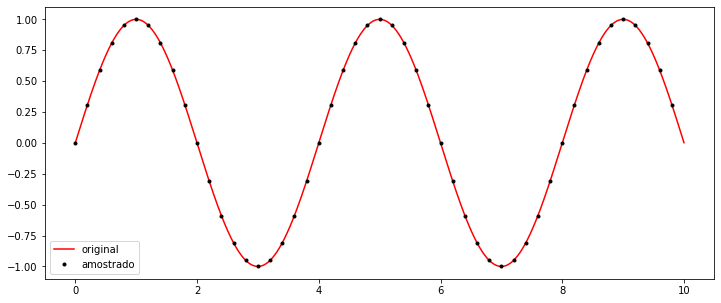

In [14]:
plt.figure(figsize=(12,5))
plt.plot(t,sinal,"r",label="original")
plt.plot(t_2,sinal_2,".k",label="amostrado")
plt.legend()
plt.show()

Posteriormente, vamos estudar a fundo alguns problemas que podem surgir com a discretização de sinais, como o aliasing. Se não definirmos a taxa de amostragem de forma correta, podemos não adquirir nosso sinal devidamente.

Vamos ilustrar isso a partir de um exemplo:

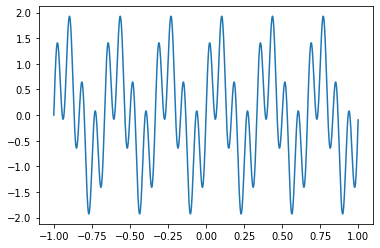

In [15]:
dt = 0.001 #criamos um dt bem pequeno para fingir que esse sinal original é contínuo
t = np.arange(-1,1,dt)

fr_1 = 3 
fr_2 = 12

sinal_1 = np.sin(2*np.pi*fr_1*t) 
sinal_2 = np.sin(2*np.pi*fr_2*t) 

sinal = sinal_1 + sinal_2 #criando o dado contínuo

plt.plot(t,sinal)

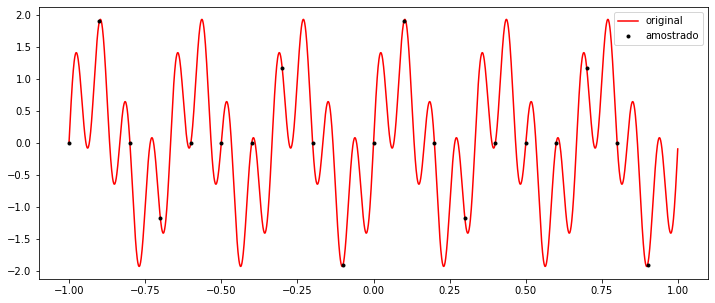

In [16]:
fs = 10.0 #Hz, taxa de amostragem
dt = 1/fs 

ts = np.arange(-1,1,dt) #pontos das amostras
gs_1 = np.sin(2*np.pi*fr_1*ts) 
gs_2 = np.sin(2*np.pi*fr_2*ts) 

gs = gs_1 + gs_2

plt.figure(figsize=(12,5))
plt.plot(t,sinal,"r",label="original")
plt.plot(ts,gs,".k",label="amostrado")
plt.legend()
plt.show()

Perceba como adquirimos poucas amostras do nosso sinal. 

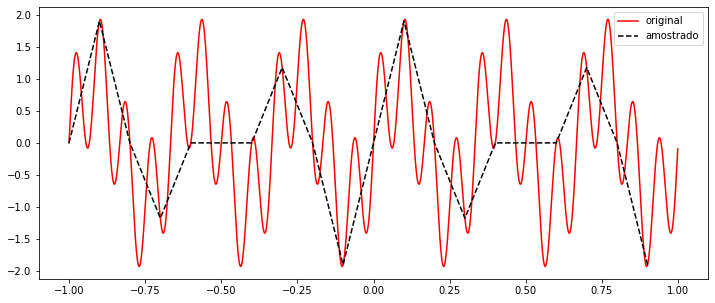

In [17]:
plt.figure(figsize=(12,5))
plt.plot(t,sinal,"r",label="original")
plt.plot(ts,gs,"--k",label="amostrado")
plt.legend()
plt.show()

Se aumentarmos a taxa de amostragem:

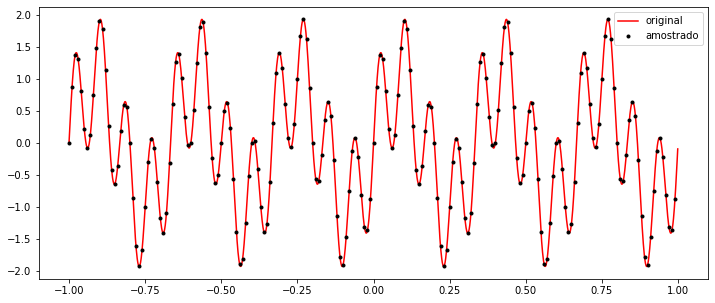

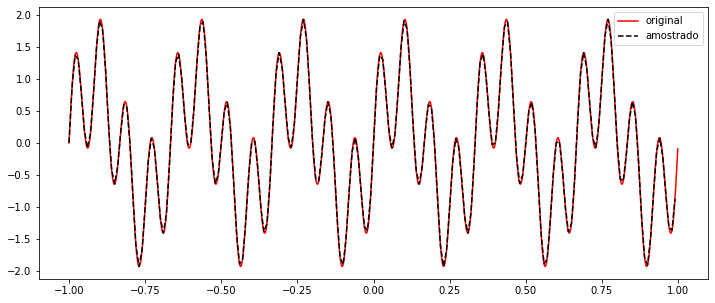

In [18]:
fs = 100.0 #Hz, taxa de amostragem
dt = 1/fs 

ts = np.arange(-1,1,dt) #pontos das amostras
gs_1 = np.sin(2*np.pi*fr_1*ts) 
gs_2 = np.sin(2*np.pi*fr_2*ts) 

gs_novo = gs_1 + gs_2

plt.figure(figsize=(12,5))
plt.plot(t,sinal,"r",label="original")
plt.plot(ts,gs_novo,".k",label="amostrado")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t,sinal,"r",label="original")
plt.plot(ts,gs_novo,"--k",label="amostrado")
plt.legend()
plt.show()

In [19]:
print(f"Número de amostras do primeiro sinal amostrado = {len(gs)}")
print(f"Número de amostras do segundo sinal amostrado = {len(gs_novo)}")

Número de amostras do primeiro sinal amostrado = 20
Número de amostras do segundo sinal amostrado = 200


Resolvemos o problema, mas o número de amostras aumentou muito. E se o nosso equipamento não tiver memória suficiente para armazenar todas essas amostras? Vamos estudar formas eficientes de amostrar um sinal nas próximas aulas e aprender termos como interpolação sinc e frequência de Nyquist.